<a href="https://colab.research.google.com/github/rahiakela/data-learning-research-and-practice/blob/main/deep-learning-with-python-by-francois-chollet/3-introduction-to-keras-and-tensorflow/01_tensorflow_fundametal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##First steps with TensorFlow

As we know, training a neural network revolves around the following
concepts:

- First, low-level tensor manipulation—the infrastructure that underlies all modern machine learning. This translates to TensorFlow APIs:
  - Tensors, including special tensors that store the network’s state (variables)
  - Tensor operations such as addition, relu, matmul
  - Backpropagation, a way to compute the gradient of mathematical expressions

- Second, high-level deep learning concepts. This translates to Keras APIs:
  - Layers, which are combined into a model
  - A loss function, which defines the feedback signal used for learning
  - An optimizer, which determines how learning proceeds
  - Metrics to evaluate model performance, such as accuracy
  - A training loop that performs mini-batch stochastic gradient descent

Now let’s take a deeper dive into how all of these different concepts can be
approached in practice using TensorFlow and Keras.

##Setup

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

##Constant tensors and variables

To do anything in TensorFlow, we’re going to need some tensors. Tensors need to be created with some initial value. 

For instance, you could create all-ones or all-zeros tensors, or tensors of values drawn from a random distribution.

**All-ones or all-zeros tensors**

In [2]:
x = tf.ones(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [3]:
x = np.ones(shape=(2, 1))
print(x)

[[1.]
 [1.]]


In [4]:
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


In [5]:
x = np.zeros(shape=(2, 1))
print(x)

[[0.]
 [0.]]


**Random tensors**

In [6]:
# Tensor of random values drawn from a normal distribution with mean 0 and standard deviation 1.
x = tf.random.normal(shape=(3, 1), mean=0.0, stddev=1.0)
print(x)

tf.Tensor(
[[1.4842637]
 [1.2667865]
 [0.6963157]], shape=(3, 1), dtype=float32)


In [7]:
x = np.random.normal(size=(3, 1), loc=0.0, scale=1.0)
print(x)

[[-2.51617273]
 [-0.6613153 ]
 [ 0.17460165]]


In [8]:
# Tensor of random values drawn from a uniform distribution between 0 and 1.
x = tf.random.uniform(shape=(3, 1), minval=0.0, maxval=1.0)
print(x)

tf.Tensor(
[[0.23288548]
 [0.9568776 ]
 [0.5369797 ]], shape=(3, 1), dtype=float32)


In [9]:
x = np.random.uniform(size=(3, 1), low=0.0, high=1.0)
print(x)

[[0.74577019]
 [0.39281842]
 [0.94942757]]


A significant difference between NumPy arrays and TensorFlow tensors is that Tensor-
Flow tensors aren’t assignable: they’re constant. 

For instance, in NumPy, you can do
the following.

In [10]:
x = np.ones(shape=(2, 2))
print(x)

[[1. 1.]
 [1. 1.]]


In [11]:
x[0, 0] = 0.0
print(x)

[[0. 1.]
 [1. 1.]]


Try to do the same thing in TensorFlow, and you will get an error: “EagerTensor object
does not support item assignment.”

In [12]:
x = tf.ones(shape=(2, 2))
print(x)

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)


In [13]:
# x[0, 0] = 0.0

```log
---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
<ipython-input-14-b9cc6021f76a> in <module>()
----> 1 x[0, 0] = 0.0
      2 print(x)

TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment
```

To train a model, we’ll need to update its state, which is a set of tensors. If tensors aren’t assignable, how do we do it?

That’s where variables come in. `tf.Variable` is the
class meant to manage modifiable state in TensorFlow.

To create a variable, you need to provide some initial value, such as a random tensor.

In [14]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 0.08522119],
       [-0.07175814],
       [ 0.456301  ]], dtype=float32)>


The state of a variable can be modified via its assign method, as follows.

In [15]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

It also works for a subset of the coefficients.

In [16]:
v[0, 0].assign((3.0))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [17]:
v[1, 0].assign((4.0))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [4.],
       [1.]], dtype=float32)>

Similarly, assign_add() and assign_sub() are efficient equivalents of += and -=, as shown next.

In [18]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [5.],
       [2.]], dtype=float32)>

In [19]:
v.assign_sub(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [4.],
       [1.]], dtype=float32)>

##Tensor operations: Doing math in TensorFlow

Just like NumPy, TensorFlow offers a large collection of tensor operations to express
mathematical formulas.

In [20]:
a = tf.ones((2, 2))
print(a)

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)


In [21]:
b = tf.square(a)  # Take the square
print(b)

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)


In [22]:
c = tf.sqrt(a)  # Take the square root
print(c)

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)


In [23]:
d = b + c  # Add two tensors (element-wise).
print(d)

tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)


In [24]:
e = tf.matmul(a, b)  # Take the product of two tensors
print(e)

tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)


In [25]:
e *= d   # Multiply two tensors
print(e)

tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)


Importantly, each of the preceding operations gets executed on the fly: at any point,
you can print what the current result is, just like in NumPy. We call this eager execution.

##A look at the GradientTape API

So far, TensorFlow seems to look a lot like NumPy. But here’s something NumPy can’t do: retrieve the gradient of any differentiable expression with respect to any of its inputs. 

Just open a GradientTape scope, apply some computation to one or several input tensors, and retrieve the gradient of the result with respect to the inputs.

In [26]:
input_var = tf.Variable(initial_value=3.)

with tf.GradientTape() as tape:
  result = tf.square(input_var)

gradient = tape.gradient(result, input_var)
print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


This is most commonly used to retrieve the gradients of the loss of a model with
respect to its weights: `gradients = tape.gradient(loss, weights)`.

So far, you’ve only seen the case where the input tensors in `tape.gradient()` were
TensorFlow variables. 

It’s actually possible for these inputs to be any arbitrary tensor.
However, only trainable variables are tracked by default. With a constant tensor, you’d
have to manually mark it as being tracked by calling `tape.watch()` on it.

In [27]:
input_const = tf.constant(3.)

with tf.GradientTape() as tape:
  tape.watch(input_const)
  result = tf.square(input_const)

gradient = tape.gradient(result, input_const)
print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


To avoid wasting resources, the tape needs to know what to watch. Trainable variables
are watched by default because computing the gradient of a loss with regard to a list of
trainable variables is the most common use of the gradient tape.

The gradient tape is a powerful utility, even capable of computing second-order gradients,
that is to say, the gradient of a gradient. 

For instance, the gradient of the position
of an object with regard to time is the speed of that object, and the second-order
gradient is its acceleration.

If you measure the position of a falling apple along a vertical axis over time and
find that it verifies `position(time) = 4.9 * time ** 2`, what is its acceleration? 

Let’s use two nested gradient tapes to find out.

In [28]:
time = tf.Variable(0.0)

with tf.GradientTape() as outer_tape:
  with tf.GradientTape() as inner_tape:
    position = 4.9 * time ** 2
  speed = inner_tape.gradient(position, time)

# We use the outer tape to compute the gradient of the gradient from the inner tape. Naturally, the answer is 4.9 * 2 = 9.8.
acceleration = outer_tape.gradient(speed, time)
print(speed)
print(acceleration)

tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(9.8, shape=(), dtype=float32)


##An end-to-end example: A linear classifier in pure TensorFlow

In a machine learning job interview, you may be asked to implement a linear classifier
from scratch in TensorFlow: a very simple task that serves as a filter between candidates
who have some minimal machine learning background and those who don’t.

Let’s get you past that filter and use your newfound knowledge of TensorFlow to
implement such a linear classifier.

First, let’s come up with some nicely linearly separable synthetic data to work with:
two classes of points in a 2D plane. We’ll generate each class of points by drawing their
coordinates from a random distribution with a specific covariance matrix and a specific
mean.

Intuitively, the covariance matrix describes the shape of the point cloud,
and the mean describes its position in the plane.

In [29]:
# Generating two classes of random points in a 2D plane
num_samples_per_class = 1000

# Generate the first class of points: 1000 random 2D points. cov=[[1,0.5],[0.5, 1]] corresponds to an oval-like point cloud oriented from bottom left to top right.
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class
)

# Generate the other class of points with a different mean and the same covariance matrix.
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class
)

In [30]:
negative_samples.shape

(1000, 2)

In [31]:
positive_samples.shape

(1000, 2)

In the preceding code, negative_samples and positive_samples are both arrays
with shape `(1000, 2)`. 

Let’s stack them into a single array with shape `(2000, 2)`.

In [32]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
inputs.shape

(2000, 2)

Let’s generate the corresponding target labels, an array of zeros and ones of shape
`(2000, 1)`, where `targets[i, 0]` is 0 if `inputs[i]` belongs to class 0 (and inversely).

In [33]:
targets = np.vstack(
    (
        np.zeros((num_samples_per_class, 1), dtype="float32"),
        np.ones((num_samples_per_class, 1), dtype="float32")
    )
)

Next, let’s plot our data with Matplotlib.

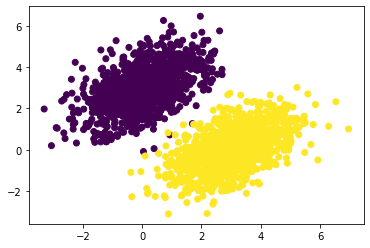

In [34]:
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

Now let’s create a linear classifier that can learn to separate these two blobs. 

A linear
classifier is an affine transformation `(prediction = W • input + b)` trained to minimize
the square of the difference between predictions and the targets.

Let’s create our variables, W and b, initialized with random values and with zeros,
respectively.

In [37]:
# The inputs will be 2D points.
input_dim = 2
output_dim = 1

W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim, )))

Here’s our forward pass function.

In [38]:
def model(inputs):
  return tf.matmul(inputs, W) + b

Because our linear classifier operates on 2D inputs, W is really just two scalar coefficients,
`w1` and `w2: W = [[w1], [w2]]`. 

Meanwhile, `b` is a single scalar coefficient. As such,
for a given input point `[x, y]`, its prediction value is `prediction = [[w1], [w2]] • [x,
y] + b = w1 * x + w2 * y + b`.

In [41]:
def square_loss(targets, predictions):
  # per_sample_losses will be a tensor with the same shape as targets and predictions, containing per-sample loss scores.
  per_sample_losses = tf.square(targets - predictions)
  # We need to average these per-sample loss scores into a single scalar loss value: this is what reduce_mean does.
  return tf.reduce_mean(per_sample_losses)

Next is the training step, which receives some training data and updates the weights W
and b so as to minimize the loss on the data.

In [42]:
learning_rate = 0.1

def training_step(inputs, targets):
  # Forward pass, inside a gradient tape scope
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(targets, predictions)
  # Retrieve the gradient of the loss with regard to weights.
  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
  # Now, Update the weights
  W.assign_sub(grad_loss_wrt_W * learning_rate)
  b.assign_sub(grad_loss_wrt_b * learning_rate)

  return loss

For simplicity, we’ll do batch training instead of mini-batch training: we’ll run each training
step (gradient computation and weight update) for all the data, rather than iterate over
the data in small batches.

In [43]:
for step in range(40):
  loss = training_step(inputs, targets)
  print(f"Loss at step {step}: {loss: .4f}")

Loss at step 0:  4.3322
Loss at step 1:  0.8249
Loss at step 2:  0.2591
Loss at step 3:  0.1588
Loss at step 4:  0.1340
Loss at step 5:  0.1221
Loss at step 6:  0.1129
Loss at step 7:  0.1049
Loss at step 8:  0.0977
Loss at step 9:  0.0911
Loss at step 10:  0.0851
Loss at step 11:  0.0797
Loss at step 12:  0.0748
Loss at step 13:  0.0704
Loss at step 14:  0.0663
Loss at step 15:  0.0626
Loss at step 16:  0.0593
Loss at step 17:  0.0562
Loss at step 18:  0.0535
Loss at step 19:  0.0510
Loss at step 20:  0.0487
Loss at step 21:  0.0466
Loss at step 22:  0.0448
Loss at step 23:  0.0431
Loss at step 24:  0.0415
Loss at step 25:  0.0401
Loss at step 26:  0.0388
Loss at step 27:  0.0377
Loss at step 28:  0.0366
Loss at step 29:  0.0357
Loss at step 30:  0.0348
Loss at step 31:  0.0340
Loss at step 32:  0.0333
Loss at step 33:  0.0327
Loss at step 34:  0.0321
Loss at step 35:  0.0315
Loss at step 36:  0.0310
Loss at step 37:  0.0306
Loss at step 38:  0.0302
Loss at step 39:  0.0298


After 40 steps, the training loss seems to have stabilized around 0.025. 

Let’s plot how
our linear model classifies the training data points. Because our targets are zeros and
ones, a given input point will be classified as “0” if its prediction value is below 0.5, and
as “1” if it is above 0.5.

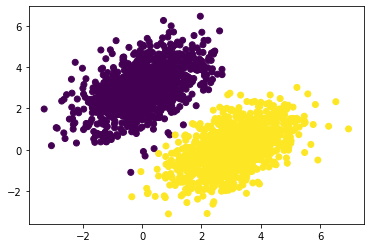

In [44]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

Recall that the prediction value for a given point `[x, y]` is simply `prediction == [[w1], [w2]] • [x, y] + b == w1 * x + w2 * y + b`. Thus, class 0 is defined as `w1 * x + w2 * y + b < 0.5`, and class 1 is defined as `w1 * x + w2 * y + b > 0.5`.

You’ll notice that what
you’re looking at is really the equation of a line in the 2D plane: `w1 * x + w2 * y + b = 0.5`.

Above the line is class 1, and below the line is class 0. You may be used to seeing line
equations in the format `y = a * x + b`; in the same format, our line becomes `y = - w1 / w2 * x + (0.5 - b) / w2`.

Let’s plot this line.


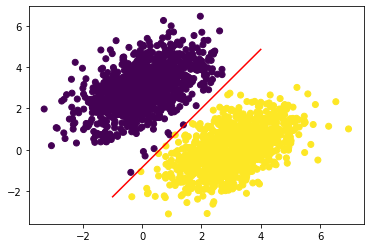

In [45]:
# Generate 100 regularly spaced numbers between –1 and 4, which we will use to plot our line
x = np.linspace(-1, 4, 100)
# This is our line’s equation
y = - W[0] / W[1] * x + (0.5 - b) / W[1]

# Plot our line ("-r" means “plot it as a red line”)
plt.plot(x, y, "-r")
# Plot our model’s predictions on the same plot
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

This is really what a linear classifier is all about: finding the parameters of a line (or, in
higher-dimensional spaces, a hyperplane) neatly separating two classes of data.